In [1]:
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import random

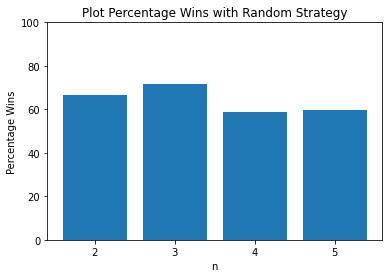

In [11]:
def generate_matrices(n):
    all_positions = range(n * n)
    zero_positions = list(combinations(all_positions, n * n // 2 + n * n % 2))
    
    zero_determinants = 0 
    for zero_pos in zero_positions:
        matrix = np.ones(n * n, dtype=int)
        for pos in zero_pos:
            matrix[pos] = 0
        matrix = matrix.reshape(n, n)
        if np.linalg.det(matrix) == 0:
            zero_determinants += 1
    percentage = (zero_determinants / len(zero_positions)) * 100
    return percentage

x_values = np.array([2, 3, 4, 5])
y_values = [generate_matrices(x) for x in x_values]

plt.bar(x_values, y_values)
plt.xlabel('n')
plt.ylabel('Percentage Wins')
plt.ylim([0, 100])
plt.xticks(x_values)
plt.title('Plot Percentage Wins with Random Strategy')
plt.show()

In [16]:
def player_move(matrix):
    print("Current matrix:")
    for row in matrix:
        print(row)
    while True:
        try:
            x, y = map(int, input("Enter the row and column to place a 0, separated by a space: ").split())
            x -= 1  
            y -= 1 
            if matrix[x][y] is None:
                matrix[x][y] = 0
                break
            else:
                print("This cell is already filled. Please choose another.")
        except (ValueError, IndexError):
            print("Invalid input. Please enter row and column as two numbers, separated by a space.")

def computer_move(matrix):
    empty_cells = [(i, j) for i in range(len(matrix)) for j in range(len(matrix)) if matrix[i][j] is None]
    if empty_cells:
        x, y = random.choice(empty_cells)
        matrix[x][y] = 1

def play_matrix_game(n):
    matrix = [[None for _ in range(n)] for _ in range(n)]
    player_choice = input("Do you want to go first or second?: ").strip().lower()
    if player_choice not in ['first', 'second']:
        print("Invalid choice. You must choose 'first' or 'second'.")
        return
    moves = 0
    player_turn = player_choice == 'first'
    while moves < n * n:
        if player_turn:
            player_move(matrix)
        else:
            computer_move(matrix)
        player_turn = not player_turn
        moves += 1
    print("Final matrix:")
    for row in matrix:
        print(row)
    print(f"Determinant: {np.linalg.det(np.array(matrix))}")
    if np.linalg.det(np.array(matrix)) == 0:
        print("You Won !")
    else:
        print("Computer wins :( ")

play_matrix_game(3)

Current matrix:
[None, None, None]
[None, None, None]
[None, None, None]
Current matrix:
[0, None, None]
[1, None, None]
[None, None, None]
Current matrix:
[0, 0, None]
[1, None, None]
[None, 1, None]
Current matrix:
[0, 0, 0]
[1, None, None]
[None, 1, 1]
Current matrix:
[0, 0, 0]
[1, 0, 1]
[None, 1, 1]
Final matrix:
[0, 0, 0]
[1, 0, 1]
[0, 1, 1]
Determinant: 0.0
You Won !
